# Exploratory Data Analysis: Boston Housing

---

## Introduction and Preliminaries

In this notebook, we will explore and analyze Boston Housing dataset. We will try to find patterns, connections, insights, anomalies, and visualize it to make us understand better of our dataset. Next, after exploratory data analysis, we will try to predict the output of test set in the predictive modeling session. In the final, we will evaluate our model by several important metrics. Now, start by import the libraries and dataset (in this session, we will focus on train set).

__Import Libraries__

In [1]:
# essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

In [2]:
dataset = pd.read_csv('train.csv')

Let's take a look at the top and bottom data points of the dataset.

In [3]:
dataset.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
dataset.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


What is the shape of this dataset? How many data points are there? and how many features are there?

In [5]:
dataset.shape

(333, 15)

In train set (dataset), there are 333 data points and 15 features, including our target vector which is denote by medv. What is each feature represent? by looking at this column label, we can not understand what is each feature means? So, let's take a look on [kaggle](https://www.kaggle.com/c/boston-housing).

This data frame contains the following columns:

- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per \$10,000.
- ptratio: pupil-teacher ratio by town.
- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in \$1000s

We have 14 columns (features) with numerical data type and 1 column with categorical data type (encoded as zero and one).

Is there any missing values in our dataset?

In [6]:
dataset.isnull().any().any()

False

We don't have any missing values, which is good, it means we have a clean dataset (kinda obvious if you look at the data).

---

## Feature Exploration

Now, take a look at summary statistics of the dataset.

In [7]:
dataset.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Let's find some interesting facts and gather insights from this summary statistics by inspecting each column.

Create function to make this notebook feel less repetitive.

In [65]:
def binning(column_label, bins=10):
    return pd.cut(dataset[column_label], bins=bins).value_counts().sort_index()

def visualization(column_label):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

    # ax 0
    sns.distplot(dataset[column_label], ax=ax[0], bins=30, hist_kws={'alpha':0.8})
    ax[0].set_xlim(min(dataset[column_label]), max(dataset[column_label]))
    ax[0].set_xlabel((''))
    ax[0].set_title('Distribution')

    # ax 1
    sns.boxplot(dataset[column_label], ax=ax[1], color='green', orient='v')
    sns.swarmplot(dataset[column_label], ax=ax[1], color='orange', orient='v')
    ax[1].set_xlabel((''))
    ax[1].set_title('Box and Swarm');

def feature_summary(column_label):
    return dataset[column_label].describe()

### crim

Recall: crim column represents per capita crime rate by town.

In [66]:
feature_summary('crim')

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In the summary statistics, we see that in column 'crim' we have the average 3.36, with standard deviation 7.35. Are there any bizzare attributes? If we look the minimum value and maximum value, there is a huge gap between them. Also if we see the third quartile (75%) and maximum value, this is where the gap feel so wide. Our interquartile range is just ~3.6 units but the gap between third quartile and maximum value ~70 units. What it means? First, probably there are errors when data collecting process which resulting outliers; second, maybe this insight is really true, there are some extreme values in column 'crim'.

In [67]:
binning('crim')

(-0.0672, 7.359]    279
(7.359, 14.712]      35
(14.712, 22.065]      9
(22.065, 29.417]      6
(29.417, 36.77]       0
(36.77, 44.123]       2
(44.123, 51.476]      1
(51.476, 58.829]      0
(58.829, 66.181]      0
(66.181, 73.534]      1
Name: crim, dtype: int64

There are 279 data points in interval between minimum and first decile, so our data points majorly lie in this area.

Let's see the distribution!

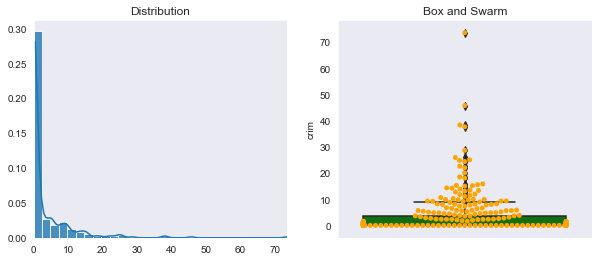

In [68]:
visualization('crim')

Insights:

Here, we can guess that boston is quite safe in term of crime rate, but also we have to consider there is a probabilty that crime rate is pretty high. 

### zn

Recall: zn represents proportion of residential land zoned for lots over 25,000 sq.ft.

In [72]:
feature_summary('zn')

count    333.000000
mean      10.689189
std       22.674762
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In here, i am binning the data points in its interval, and we see that 248 data points lie in interval 0 - 10. But, if we look in our data, mostly in this interval the data point's value is zero. Let's check it!

In [73]:
binning('zn')

(-0.1, 10.0]     248
(10.0, 20.0]      22
(20.0, 30.0]      22
(30.0, 40.0]       9
(40.0, 50.0]       5
(50.0, 60.0]       7
(60.0, 70.0]       0
(70.0, 80.0]      10
(80.0, 90.0]       6
(90.0, 100.0]      4
Name: zn, dtype: int64

In [10]:
(dataset['zn'] == 0).sum()

248

There are 248 data point with value equals zero. Now, take a look on its distribution!

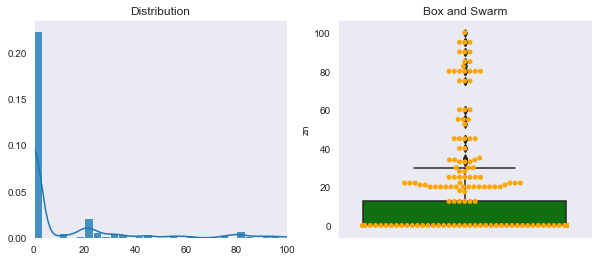

In [76]:
visualization('zn')

Insights:

From summary statistics and visualization, we see that our data focus in low interval value, with zero as the majority. By looking at the mean and the standard deviation, we know that this data is quite dispersed. For interval greater than third quartile (with value 12.5), the distribution is scarce.

### indus

Recall: indus represents proportion of non-retail business acres per town.

In [74]:
feature_summary('indus')

count    333.000000
mean      11.293483
std        6.998123
min        0.740000
25%        5.130000
50%        9.900000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

We see that data points lie between interval 0.74 and 27.74.

In [75]:
binning('indus')

(0.713, 3.44]      50
(3.44, 6.14]       58
(6.14, 8.84]       55
(8.84, 11.54]      27
(11.54, 14.24]     12
(14.24, 16.94]      2
(16.94, 19.64]    109
(19.64, 22.34]     10
(22.34, 25.04]      0
(25.04, 27.74]     10
Name: indus, dtype: int64

Interval with highest number of data points is between 16.94 and 19.64. But note that in the first five decile data points distribution is quite even.

Let's see the distribution and swarm-box plot.

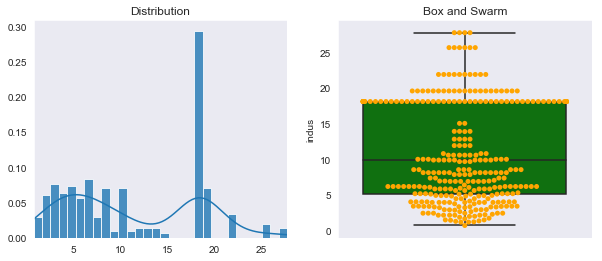

In [77]:
visualization('indus')

In this distribution we see that our data focus in narrower area.

Insights:

By looking to summary statistics of column 'indus', we see that in this column, our data lie in narrower area relatively from previous columns. 

### chas

Recall: chas represents Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

In here we have categorical type feature with already encoded values. How much data points with value one and with value zero?

In [14]:
dataset['chas'].value_counts()

0    313
1     20
Name: chas, dtype: int64

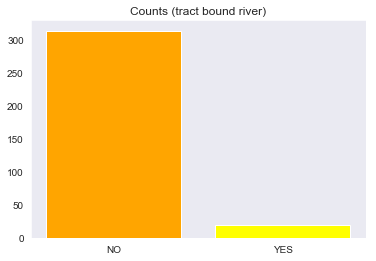

In [78]:
plt.bar([0, 1], [313, 20], color=['orange', 'yellow'])
plt.title('Counts (tract bound river)')
plt.xticks([0, 1], ['NO', 'YES']);

Insights:

313 data points are zero and 20 data points are one. Pretty huge difference if i say.

### nox

Recall: nox represents nitrogen oxides concentration (parts per 10 million).

In [79]:
feature_summary('nox')

count    333.000000
mean       0.557144
std        0.114955
min        0.385000
25%        0.453000
50%        0.538000
75%        0.631000
max        0.871000
Name: nox, dtype: float64

The mean and median of our data look pretty close to each other.

In [80]:
binning('nox')

(0.385, 0.434]    47
(0.434, 0.482]    50
(0.482, 0.531]    62
(0.531, 0.579]    39
(0.579, 0.628]    51
(0.628, 0.677]    20
(0.677, 0.725]    39
(0.725, 0.774]    15
(0.774, 0.822]     0
(0.822, 0.871]    10
Name: nox, dtype: int64

Based on interval distribution, the data is evenly distribution. Let's see the distribution!

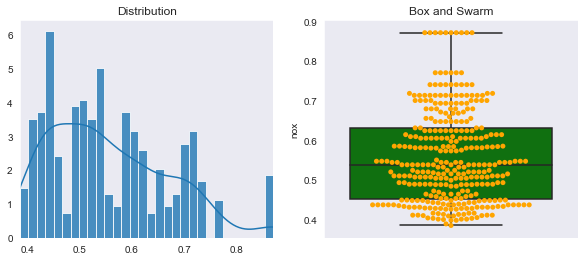

In [81]:
visualization('nox')

Insights: 

This distribution reflects that our data quite evenly distributed. Also, the mean and the median are pretty close.

### rm

Recall: rm represents average number of rooms per dwelling.

In [82]:
feature_summary('rm')

count    333.000000
mean       6.265619
std        0.703952
min        3.561000
25%        5.884000
50%        6.202000
75%        6.595000
max        8.725000
Name: rm, dtype: float64

The mean and median are quite close, with difference only ~0.06. Also ranges in quartiles are evenly spaced.

In [83]:
binning('rm')

(3.556, 4.077]      2
(4.077, 4.594]      3
(4.594, 5.11]      10
(5.11, 5.627]      29
(5.627, 6.143]    108
(6.143, 6.659]    109
(6.659, 7.176]     43
(7.176, 7.692]     15
(7.692, 8.209]      7
(8.209, 8.725]      7
Name: rm, dtype: int64

Very intersting insight. Let's see what the distribution will tell us!

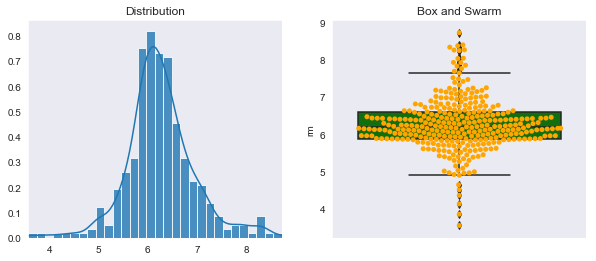

In [84]:
visualization('rm')

Insights:

Certainly very interesting distribution. Is it look like normal distribution? Our data points mean and median lie close, also evenly spaced and distributed.

### age

Recall: age represents proportion of owner-occupied units built prior to 1940.

In [85]:
feature_summary('age')

count    333.000000
mean      68.226426
std       28.133344
min        6.000000
25%       45.400000
50%       76.700000
75%       93.800000
max      100.000000
Name: age, dtype: float64

Our data points lie in interval 6 to 100. With mean and median not so close.

In [86]:
binning('age')

(5.906, 15.4]     14
(15.4, 24.8]      19
(24.8, 34.2]      24
(34.2, 43.6]      23
(43.6, 53.0]      24
(53.0, 62.4]      23
(62.4, 71.8]      24
(71.8, 81.2]      30
(81.2, 90.6]      44
(90.6, 100.0]    108
Name: age, dtype: int64

Looks like the trend is increasing, but to make sure, let's see the distribution!

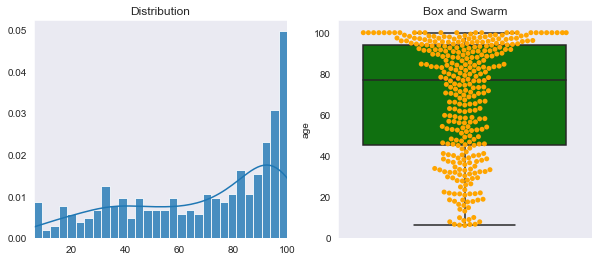

In [87]:
visualization('age')

Insights:

From the distributiona and summary statistics, we see an increasing trend. Therefore, our data points population increase the value increase.

### dis

Recall: dis represents weighted mean of distances to five Boston employment centres.

In [88]:
feature_summary('dis')

count    333.000000
mean       3.709934
std        1.981123
min        1.129600
25%        2.122400
50%        3.092300
75%        5.116700
max       10.710300
Name: dis, dtype: float64

In [89]:
binning('dis')

(1.12, 2.088]     77
(2.088, 3.046]    87
(3.046, 4.004]    48
(4.004, 4.962]    33
(4.962, 5.92]     34
(5.92, 6.878]     26
(6.878, 7.836]    15
(7.836, 8.794]     8
(8.794, 9.752]     4
(9.752, 10.71]     1
Name: dis, dtype: int64

Now, we see a decreasing trend.

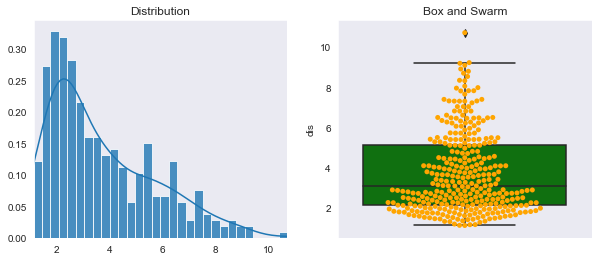

In [90]:
visualization('dis')

Insights:

The distribution looks a bit skewed to the left. Also if we see the mean and median, the median lies on left of the mean. The peak of the distribution lies on around 2.5, and decrease after it (to the right).

### rad

Recall: rad represents index of accessibility to radial highways.

In [91]:
feature_summary('rad')

count    333.000000
mean       9.633634
std        8.742174
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

In [92]:
binning('rad')

(0.977, 3.3]     55
(3.3, 5.6]      146
(5.6, 7.9]       26
(7.9, 10.2]      18
(10.2, 12.5]      0
(12.5, 14.8]      0
(14.8, 17.1]      0
(17.1, 19.4]      0
(19.4, 21.7]      0
(21.7, 24.0]     88
Name: rad, dtype: int64

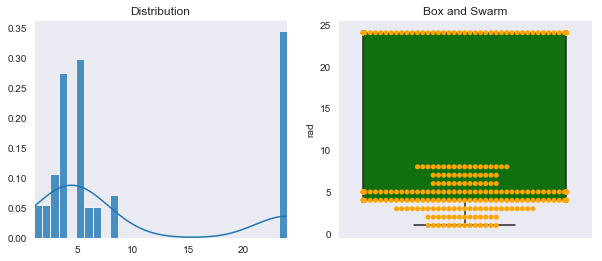

In [93]:
visualization('rad')

Insights:

The peak lies on far to the right of the distribution. With a huge gap with zero number of data points between 10 to 20.

### tax

Recall: tax represents full-value property-tax rate per $10,000.

In [94]:
feature_summary('tax')

count    333.000000
mean     409.279279
std      170.841988
min      188.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [95]:
binning('tax')

(187.477, 240.3]    41
(240.3, 292.6]      60
(292.6, 344.9]      71
(344.9, 397.2]      17
(397.2, 449.5]      51
(449.5, 501.8]       1
(501.8, 554.1]       0
(554.1, 606.4]       0
(606.4, 658.7]       0
(658.7, 711.0]      92
Name: tax, dtype: int64

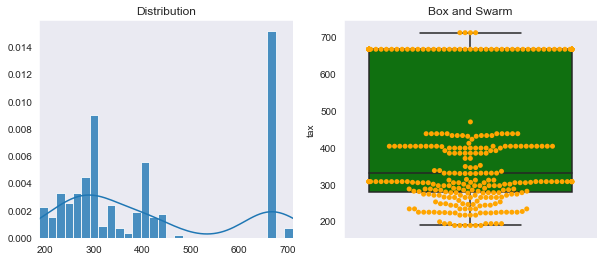

In [96]:
visualization('tax')

Insights:

Most data focused on interval 180 to 450, but we also see that there are a high peak in extreme value on the right.

### ptratio

Recall: ptratio represents pupil-teacher ratio by town.

In [97]:
feature_summary('ptratio')

count    333.000000
mean      18.448048
std        2.151821
min       12.600000
25%       17.400000
50%       19.000000
75%       20.200000
max       21.200000
Name: ptratio, dtype: float64

In [98]:
binning('ptratio')

(12.591, 13.46]      9
(13.46, 14.32]       1
(14.32, 15.18]      28
(15.18, 16.04]      19
(16.04, 16.9]       22
(16.9, 17.76]       20
(17.76, 18.62]      58
(18.62, 19.48]      33
(19.48, 20.34]     107
(20.34, 21.2]       36
Name: ptratio, dtype: int64

If we see binning of ten intervals, we know that our data points likely lie on interval in right side of the distribution.

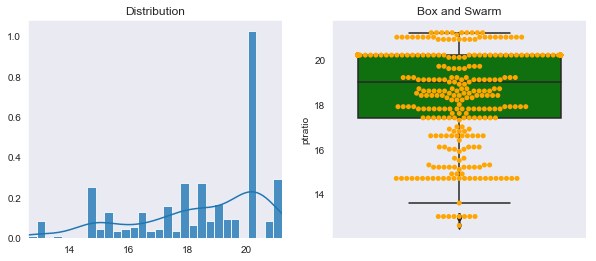

In [99]:
visualization('ptratio')

Insights:

Not so evenly distibuted data points. But we also see a peek in interval 19-20.

### black

Recall: black retpresents 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

In [100]:
feature_summary('black')

count    333.000000
mean     359.466096
std       86.584567
min        3.500000
25%      376.730000
50%      392.050000
75%      396.240000
max      396.900000
Name: black, dtype: float64

In [101]:
binning('black')

(3.107, 42.84]        8
(42.84, 82.18]        6
(82.18, 121.52]       6
(121.52, 160.86]      2
(160.86, 200.2]       1
(200.2, 239.54]       2
(239.54, 278.88]      7
(278.88, 318.22]      6
(318.22, 357.56]     21
(357.56, 396.9]     274
Name: black, dtype: int64

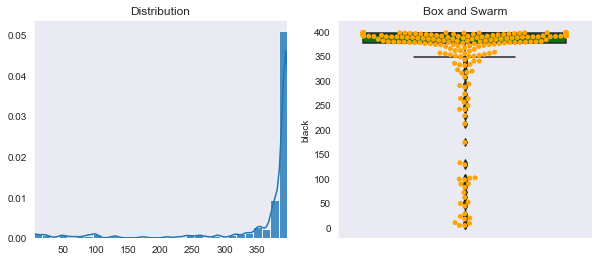

In [102]:
visualization('black')

Insights:
    
The distribution is quite flat in interval between minimum value and 318. After that there a peak, in the maximum value.

### lstat

Recall:  lstat represents lower status of the population (percent).

In [103]:
feature_summary('lstat')

count    333.000000
mean      12.515435
std        7.067781
min        1.730000
25%        7.180000
50%       10.970000
75%       16.420000
max       37.970000
Name: lstat, dtype: float64

In [104]:
binning('lstat')

(1.694, 5.354]      47
(5.354, 8.978]      74
(8.978, 12.602]     69
(12.602, 16.226]    57
(16.226, 19.85]     37
(19.85, 23.474]     19
(23.474, 27.098]    15
(27.098, 30.722]    10
(30.722, 34.346]     1
(34.346, 37.97]      4
Name: lstat, dtype: int64

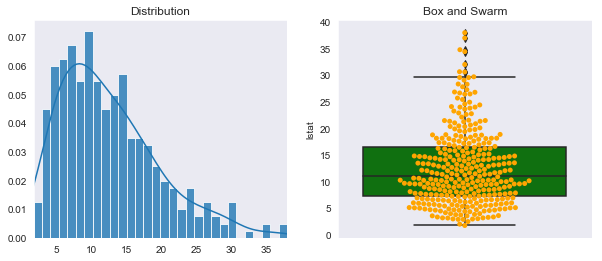

In [105]:
visualization('lstat')

Insights:

A very nice looking distribution. This distribution is certainly skewed to the left, which also we can see that in the summary statistics mean and median.

### medv

Recall: medv represents median value of owner-occupied homes in $1000s

In [106]:
feature_summary('medv')

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [107]:
binning('medv')

(4.955, 9.5]     14
(9.5, 14.0]      33
(14.0, 18.5]     52
(18.5, 23.0]    101
(23.0, 27.5]     64
(27.5, 32.0]     23
(32.0, 36.5]     21
(36.5, 41.0]      5
(41.0, 45.5]      5
(45.5, 50.0]     15
Name: medv, dtype: int64

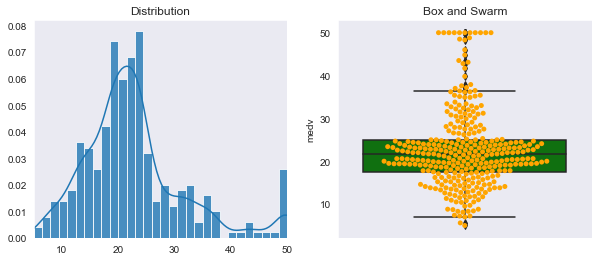

In [108]:
visualization('medv')

Insights:

This feature is the target vector in our predictive modeling later. We see that the distribution looks quite nice, with large number of data points lie in interval 18 to 23.

---

## Correlation

In [3]:
dataset_numerical = dataset.iloc[:, [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].copy()

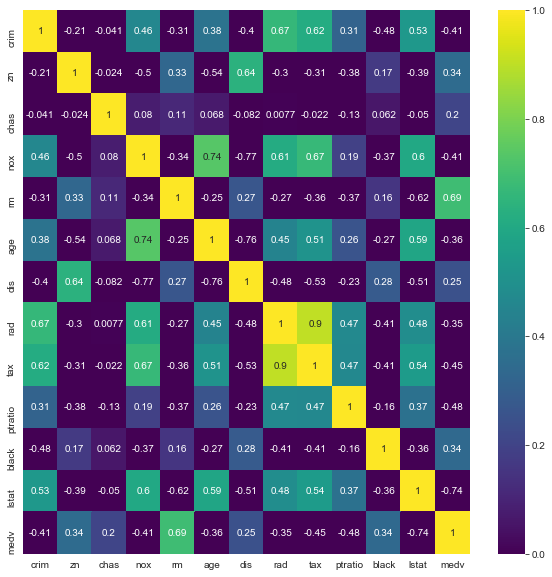

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
image = sns.heatmap(dataset_numerical.corr(), ax=ax, annot=True, vmin= 0, vmax=1, cmap='viridis')